# Deep neural networks

Converting neural networks to matrix form.


In [1]:
# Imports math library
import numpy as np
# Imports plotting library
import matplotlib.pyplot as plt

In [4]:
# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
    return np.maximum(0, preactivation)


In [5]:
# Define a shallow neural network with, one input, one output, and three hidden units
def shallow_network(x, activation_fn, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31):

    # Calculate the pre-activation of each hidden unit
    z1 = theta_10 + theta_11 * x
    z2 = theta_20 + theta_21 * x
    z3 = theta_30 + theta_31 * x

    # Apply activation function to get hidden unit outputs
    h1 = activation_fn(z1)
    h2 = activation_fn(z2)
    h3 = activation_fn(z3)

    # Calculate the output as weighted sum of hidden units plus bias
    y = phi_0 + phi_1 * h1 + phi_2 * h2 + phi_3 * h3

    return y


In [6]:
# # Plot the shallow neural network.  Input in range [-1,1] and output [-1,1]
def plot_neural(x, y):
  fig, ax = plt.subplots()
  ax.plot(x.T,y.T)
  ax.set_xlabel('Input'); ax.set_ylabel('Output')
  ax.set_xlim([-1,1]);ax.set_ylim([-1,1])
  ax.set_aspect(1.0)
  plt.show()

Let's define a network.  We'll just consider the inputs and outputs over the range [-1,1].  If you set the "plot_all" flat to True,  you can see the details of how it was created.

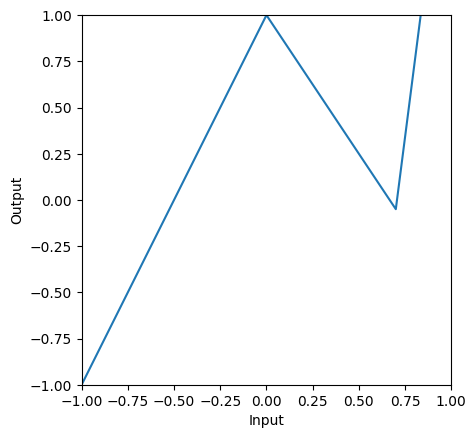

In [7]:
# Now lets define some parameters and run the first neural network
n1_theta_10 = 0.0   ; n1_theta_11 = -1.0
n1_theta_20 = 0     ; n1_theta_21 = 0.5
n1_theta_30 = -0.7 ; n1_theta_31 =  1.0
n1_phi_0 = 1.0; n1_phi_1 = -2.0; n1_phi_2 = -3.0; n1_phi_3 = 9.3

# Define a range of input values
n1_in = np.arange(-1, 1, 0.01)

# Run the neural network for each of these input values
n1_out = shallow_network(n1_in, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3,
                         n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)

# And then plot it
plot_neural(n1_in, n1_out)



Now we'll define the same neural network, but this time, we will  use matrix form.  When you get this right, it will draw the same plot as above.

Now we'll feed the output of the first network into the second one.

In [ ]:
# Now lets define some parameters and run the second neural network
n2_theta_10 =  -0.6 ; n2_theta_11 = -1.0
n2_theta_20 =  0.2  ; n2_theta_21 = 1.0
n2_theta_30 =  -0.5  ; n2_theta_31 =  1.0
n2_phi_0 = 0.5; n2_phi_1 = -1.0; n2_phi_2 = -1.5; n2_phi_3 = 2.0

# Define a range of input values
n2_in = np.arange(-1, 1, 0.01)

# We run the second neural network on the output of the first network
# And then plot it


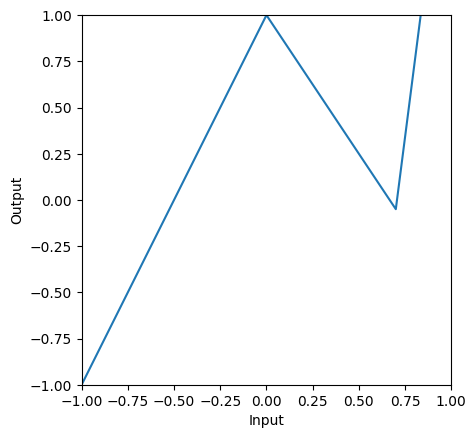

In [8]:
def shallow_network_matrix(x, activation_fn, Phi, Theta):
    # Theta is a 3x2 matrix where each row contains [theta_i0, theta_i1] for hidden unit i
    # Phi is a 1x4 vector containing [phi_0, phi_1, phi_2, phi_3]

    # Add a column of 1s to the input for the bias term
    x_with_bias = np.vstack((np.ones_like(x), x))

    # Calculate pre-activations for all hidden units at once
    Z = Theta @ x_with_bias

    # Apply activation function
    H = activation_fn(Z)

    # Add a row of 1s for the bias term in the output layer
    H_with_bias = np.vstack((np.ones_like(x), H))

    # Calculate the output
    y = Phi @ H_with_bias

    return y

# Create parameter matrices for the first network
n1_Theta = np.array([[n1_theta_10, n1_theta_11],
                      [n1_theta_20, n1_theta_21],
                      [n1_theta_30, n1_theta_31]])

n1_Phi = np.array([n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3])

# Run the matrix version of the neural network
n1_out_matrix = shallow_network_matrix(n1_in, ReLU, n1_Phi, n1_Theta)

# Plot to verify we get the same result
plot_neural(n1_in, n1_out_matrix)


Now let's make a deep network with 3 hidden layers.  It will have $D_i=4$ inputs, $D_1=5$ neurons  in the first layer, $D_2=2$ neurons in the second layer and $D_3=4$ neurons in the third layer, and $D_o = 1$ output.

In [10]:
# Initialize the parameters randomly with the correct sizes
W1 = np.random.normal(size=(D_1, D_i))
b1 = np.random.normal(size=(D_1, 1))

W2 = np.random.normal(size=(D_2, D_1))
b2 = np.random.normal(size=(D_2, 1))

W3 = np.random.normal(size=(D_3, D_2))
b3 = np.random.normal(size=(D_3, 1))

W4 = np.random.normal(size=(D_o, D_3))
b4 = np.random.normal(size=(D_o, 1))

# Forward pass through the network
# First hidden layer
z1 = W1 @ x + b1
h1 = ReLU(z1)

# Second hidden layer
z2 = W2 @ h1 + b2
h2 = ReLU(z2)

# Third hidden layer
z3 = W3 @ h2 + b3
h3 = ReLU(z3)

# Output layer
z4 = W4 @ h3 + b4
y = z4  # No activation function on the output layer

# Check shapes
if h1.shape[0] != D_1 or h1.shape[1] != n_data:
    print("h1 is wrong shape")
if h2.shape[0] != D_2 or h2.shape[1] != n_data:
    print("h2 is wrong shape")
if h3.shape[0] != D_3 or h3.shape[1] != n_data:
    print("h3 is wrong shape")
if y.shape[0] != D_o or y.shape[1] != n_data:
    print("Output is wrong shape")

# Print the inputs and outputs
print("Input data points")
print(x)
print("Output data points")
print(y)


Input data points
[[-1.05579763  0.17621576  1.06883107  0.86477854]
 [ 0.11304121  0.08951582 -2.05127951 -0.05099333]
 [ 0.9039827  -1.02873937  2.38811671 -1.37262009]
 [-0.0360257  -0.96178533  2.07979756 -0.64855537]]
Output data points
[[-0.53620074 -0.53620074 -0.53620074 -0.53620074]]
